### Name Entity From Capital Letter Words

In [24]:
#!pip install kneed

In [1]:
import pandas as pd
import numpy as np
import re
from kneed import KneeLocator

In [2]:
df = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/French/Result/Word/Data/Not_Apply_Lower_Word1.csv")
df

,word,frequency
0,de,3981257
1,pas,2693790
2,Je,2606215
3,le,2262594
4,la,2187456
...,...,...
597028,commelundesplusieursvictimes,1
597029,Morceauxassezpourfairequatre,1
597030,WilliamEastonaété,1
597031,quivousdétruire,1


In [3]:
df = df[df.iloc[:,1]>=5]

In [4]:
def word_length(var):
    var = str(var)
    if len(var) <= 12:
        return var
    else:
        return "word is bigger than adjust value"

In [5]:
df = pd.DataFrame(df.iloc[:,0].apply(lambda x: word_length(x)))

In [6]:
df.drop(df[df.iloc[:,0] == "word is bigger than adjust value"].index, axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df

,word
0,de
1,pas
2,Je
3,le
4,la
...,...
221091,spécieuse
221092,Yippitykiyay
221093,galbes
221094,Gaelou


In [7]:
capital_word_list = []
lower_word_list = []
for i in df.iloc[:,0]:
    i = str(i)
    if i[0].isupper():
        capital_word_list.append(i)
    else:
        lower_word_list.append(i)

In [8]:
df_capital = pd.DataFrame(capital_word_list)
df_capital.rename(columns={0:"word"}, inplace=True)
df_capital = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_capital

,word
0,Je
1,Cest
2,Tu
3,Il
4,Vous
...,...
102094,Wyvold
102095,Rodéo
102096,Amateur
102097,Yippitykiyay


In [9]:
df_capital_to_lower = pd.DataFrame(df_capital.iloc[:,0].apply(lambda x : x.lower()))
df_capital_to_lower

,word
0,je
1,cest
2,tu
3,il
4,vous
...,...
102094,wyvold
102095,rodéo
102096,amateur
102097,yippitykiyay


In [10]:
df_lower = pd.DataFrame(lower_word_list)
df_lower.rename(columns={0:"word"}, inplace=True)
df_lower

,word
0,de
1,pas
2,le
3,la
4,que
...,...
118992,jaifait
118993,impatienter
118994,spécieuse
118995,galbes


In [11]:
df_lower_to_lower = pd.DataFrame(df_lower.iloc[:,0].apply(lambda x : x.lower()))
df_lower_to_lower

,word
0,de
1,pas
2,le
3,la
4,que
...,...
118992,jaifait
118993,impatienter
118994,spécieuse
118995,galbes


In [12]:
capital_set = set(df_capital_to_lower.iloc[:,0])

In [13]:
lower_set = set(df_lower_to_lower.iloc[:,0])

In [14]:
df_all_capital = pd.DataFrame(capital_set.difference(lower_set))
df_all_capital.rename(columns={0:"word"}, inplace=True)
#df_all_capital = pd.DataFrame(df_all_capital.iloc[:,0].apply(lambda x: x.capitalize()))
df_all_capital

,word
0,briana
1,larrin
2,admmxi
3,agro
4,ecclésiaste
...,...
57621,mael
57622,kewpie
57623,maryam
57624,tosca


In [21]:
# Check result with all capital word
# df_merge = pd.merge(df_capital, df_all_capital, how="inner", on="word")
# df_merge.drop_duplicates(inplace=True)
# df_merge.reset_index(drop=True, inplace=True)
# df_merge

In [ ]:
df_all_capital.to_excel("All_Capital_Word.xlsx", sheet_name="Word", index=False)

In [15]:
df_sent = pd.read_csv("/media/kurubal/SSD/Data Scientist/Work/Modern Ways/Project/French/Result/Sentence/Merge/Sentence_Merge_Result2.csv")
df_sent

,sentence,frequency
0,oui,756745
1,non,718649
2,quoi,467154
3,merci,406234
4,daccord,264448
...,...,...
8578197,makise a rejoint genji,2
8578198,makise est introuvable,2
8578199,makittaqanngitsoq,2
8578200,makkie,2


In [16]:
df_sent = df_sent[df_sent.iloc[:,1]>=5]

In [17]:
first_words = []
for i in df_sent.iloc[:,0]: # Select sentence first word
    words = re.findall("\w+", i)
    first_words.append(words[0])

In [18]:
first_ser = pd.Series(first_words)
first_ser

0               oui
1               non
2              quoi
3             merci
4           daccord
             ...   
2477799         ton
2477800    pourquoi
2477801          si
2477802       prête
2477803          je
Length: 2477804, dtype: object

In [19]:
df_first = pd.DataFrame(first_ser.value_counts(ascending=False))
df_first.reset_index(inplace=True)
df_first.rename(columns={"index":"word", 0:"frequency"}, inplace=True)
df_first

,word,frequency
0,je,239094
1,tu,118754
2,il,110982
3,cest,105282
4,on,84461
...,...,...
83563,cuántos,1
83564,marlow,1
83565,markowitz,1
83566,marquant,1


In [20]:
set_first = set(df_first.iloc[:,0])

In [21]:
set_all_capital = set(df_all_capital.iloc[:,0])

In [22]:
df_all_spec = pd.DataFrame(set_all_capital.difference(set_first)) # ???
df_all_spec.rename(columns={0:"word"}, inplace=True)
df_all_spec

,word
0,agro
1,admmxi
2,langelus
3,kameyata
4,gautamâ
...,...
34446,alun
34447,quirrell
34448,mael
34449,kewpie


In [23]:
df_first = df_first[df_first.iloc[:,1]>=5]

In [24]:
total_frequency = df_first.iloc[:,1].sum()
total_frequency

2375224

In [25]:
df_first["ratio"] = round(((df_first.iloc[:,1]/total_frequency)*100),7)
df_first

,word,frequency,ratio
0,je,239094,10.066166
1,tu,118754,4.999697
2,il,110982,4.672486
3,cest,105282,4.432508
4,on,84461,3.555917
...,...,...,...
13905,pearly,5,0.000210
13906,fouillons,5,0.000210
13907,matilde,5,0.000210
13908,quessayestu,5,0.000210


In [26]:
df_first["cumul_ratio"] = np.cumsum(df_first.iloc[:,2])
df_first

,word,frequency,ratio,cumul_ratio
0,je,239094,10.066166,10.066166
1,tu,118754,4.999697,15.065863
2,il,110982,4.672486,19.738349
3,cest,105282,4.432508,24.170857
4,on,84461,3.555917,27.726775
...,...,...,...,...
13905,pearly,5,0.000210,99.999014
13906,fouillons,5,0.000210,99.999224
13907,matilde,5,0.000210,99.999435
13908,quessayestu,5,0.000210,99.999645


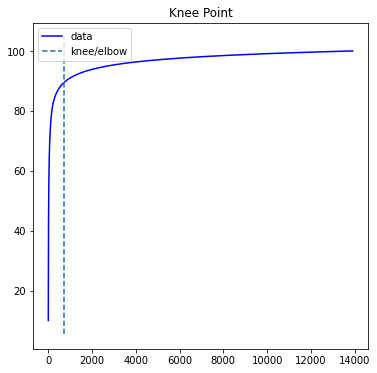

In [27]:
word_kneedle = KneeLocator(x=df_first.cumul_ratio.index, y=df_first.cumul_ratio, S=1.0, curve="concave", direction="increasing")
word_kneedle.plot_knee()

In [28]:
print(round(word_kneedle.knee_y))

90


In [29]:
knee_point_word = round(word_kneedle.knee_y)

In [30]:
df_first_knee = df_first[df_first.cumul_ratio <= knee_point_word]
df_first_knee

,word,frequency,ratio,cumul_ratio
0,je,239094,10.066166,10.066166
1,tu,118754,4.999697,15.065863
2,il,110982,4.672486,19.738349
3,cest,105282,4.432508,24.170857
4,on,84461,3.555917,27.726775
...,...,...,...,...
799,rester,138,0.005810,89.975556
800,big,138,0.005810,89.981366
801,voila,137,0.005768,89.987134
802,coupe,137,0.005768,89.992902


In [31]:
df_first_no_knee = df_first[df_first.cumul_ratio > knee_point_word]
df_first_no_knee.reset_index(drop=True, inplace=True)
df_first_no_knee = df_first_no_knee.iloc[:,0:2]
df_first_no_knee

,word,frequency
0,maria,136
1,levez,136
2,nouvelle,136
3,pouvonsnous,135
4,alerte,135
...,...,...
13101,pearly,5
13102,fouillons,5
13103,matilde,5
13104,quessayestu,5


In [32]:
#df_first_no_knee.to_excel("First_Word_No_Knee.xlsx", sheet_name="Word", index=False)

In [33]:
set_first_knee = set(df_first_knee.iloc[:,0])

In [34]:
set_first_no_knee = set(df_first_no_knee.iloc[:,0])

In [70]:
#set_all_capital = set(df_all_capital.iloc[:,0])

In [35]:
df_all_knee = pd.DataFrame(set_all_capital.difference(set_first_knee)) # ???
df_all_knee.rename(columns={0:"word"}, inplace=True)
df_all_knee

,word
0,agro
1,briana
2,larrin
3,admmxi
4,ecclésiaste
...,...
57613,mael
57614,hwang
57615,consclence
57616,kewpie
